# Key Performance Indicators

1. Trips based on Temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])

In [29]:
# import prepared data set
df_la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time","Date"],low_memory=False)
df_weather = pd.read_csv("prepared_data_weather.csv", parse_dates=["date_time"],low_memory=False)

In [3]:
df_la.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Weekday,Hour,Month,Day
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,0,1,1
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,0,1,1
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,0,1,1


In [4]:
df_weather.head(3)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6
1,35041,2019-01-01 02:00:00,15.0,15.0,0.0,2019.0,15.0
2,35042,2019-01-01 03:00:00,15.0,15.0,0.0,2019.0,15.0


In [5]:
df_la[(df_la["Month"] == 1) & (df_la["Day"] == 1) & (df_la["Hour"] == 1)].size


120

In [6]:
df_la[(df_la["Date"] == "2019-01-01")&(df_la["Hour"] == 1)].size

120

In [7]:
def get_trips(datetime):
    return df_la[(df_la["Month"] == datetime.month) &(df_la["Day"] == datetime.day) & (df_la["Hour"] == datetime.hour)].size


In [8]:
df_weather["num_trips"] = df_weather["date_time"].apply(get_trips)

In [9]:
df_weather.head(3)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp,num_trips
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6,120
1,35041,2019-01-01 02:00:00,15.0,15.0,0.0,2019.0,15.0,240
2,35042,2019-01-01 03:00:00,15.0,15.0,0.0,2019.0,15.0,30


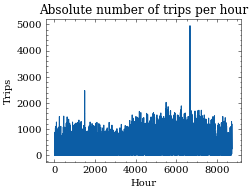

In [15]:
plt.plot(df_weather.index, df_weather["num_trips"], label='Trips per hour')
plt.title('Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

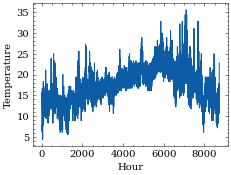

In [21]:
plt.plot(df_weather.index, df_weather["temp"], label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()

In [17]:
temp_count = df_weather["temp"].value_counts()
df = temp_count.to_frame().rename(columns = {'temp': 'count'})
df['temp'] = df.index
df.reset_index(drop=True, inplace=True) 
df

,count,temp
0,492,17.80
1,457,17.20
2,443,18.30
3,413,15.60
4,410,16.70
...,...,...
110,1,10.25
111,1,11.15
112,1,14.20
113,1,4.40


In [30]:
df_la.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Weekday,Hour,Month,Day
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,0,1,1
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,0,1,1
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,0,1,1


In [25]:
def replace_minutes(dt):
    return dt.replace(minute=0)

df_la["Date"] = df_la["Date"].apply(replace_minutes)

In [ ]:
df_b.temperature = df_b.temperature.astype(int)
data_t['temp'] = df_b.temperature.value_counts()
data_t.sort_index(inplace=True)

Text(0, 0.5, 'Trips')

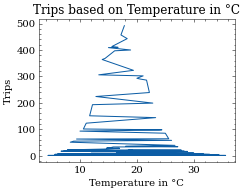

In [22]:
plt.plot(df["temp"], df["count"], label='Trips for each Temperature')
plt.title("Trips based on Temperature in °C")
plt.xlabel('Temperature in °C') 
plt.ylabel('Trips')